<a href="https://colab.research.google.com/github/nikeshgamal24/Car-Price-Prediction-Project/blob/main/Car_Price_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings
%matplotlib inline

https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/data

In [2]:
data = pd.read_csv("car_prediction_data.csv")

In [6]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
45,ciaz,2014,7.50,12.04,15000,Petrol,Dealer,Automatic,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
65,etios liva,2014,4.75,6.95,45000,Diesel,Dealer,Manual,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1


In [7]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
for col in data.columns:
  print(f"Column Name: {col},   Data Type: {data[col].dtype}")
  print(f"Unique Value Count: {len(data[col].unique())}")
  print("--"*20)

Column Name: Car_Name,   Data Type: object
Unique Value Count: 98
----------------------------------------
Column Name: Year,   Data Type: int64
Unique Value Count: 16
----------------------------------------
Column Name: Selling_Price,   Data Type: float64
Unique Value Count: 156
----------------------------------------
Column Name: Present_Price,   Data Type: float64
Unique Value Count: 147
----------------------------------------
Column Name: Kms_Driven,   Data Type: int64
Unique Value Count: 206
----------------------------------------
Column Name: Fuel_Type,   Data Type: object
Unique Value Count: 3
----------------------------------------
Column Name: Seller_Type,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Transmission,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Owner,   Data Type: int64
Unique Value Count: 3
----------------------------------------


In [10]:
print(f"Unique Values of Fuel_Type: {data['Fuel_Type'].unique()}")
print(f"Unique Values of Seller_Type: {data['Seller_Type'].unique()}")
print(f"Unique Values of Transmission: {data['Transmission'].unique()}")
print(f"Unique Values of Owner: {data['Owner'].unique()}")

Unique Values of Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Unique Values of Seller_Type: ['Dealer' 'Individual']
Unique Values of Transmission: ['Manual' 'Automatic']
Unique Values of Owner: [0 1 3]


In [12]:
## 1. Missing values
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [13]:
## 2. duplicated records
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [14]:
## Remove duplicate values from the dataset

In [15]:
data.drop_duplicates(keep="first",inplace=True)

In [16]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [19]:
## 3. DIstribution of the numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

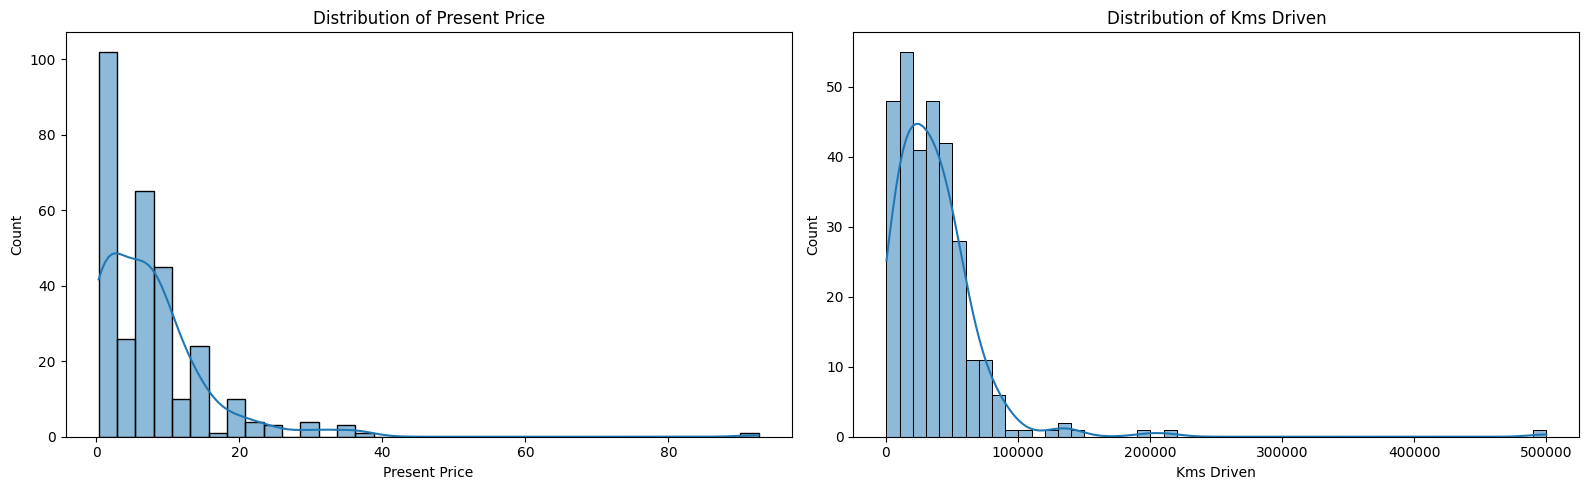

In [24]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Present_Price"], kde=True)
plt.title("Distribution of Present Price") # Add a title for clarity
plt.xlabel("Present Price") # Add x-axis label

plt.subplot(1, 2, 2)
sns.histplot(data["Kms_Driven"], kde=True)
plt.title("Distribution of Kms Driven") # Add a title for clarity
plt.xlabel("Kms Driven") # Add x-axis label

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

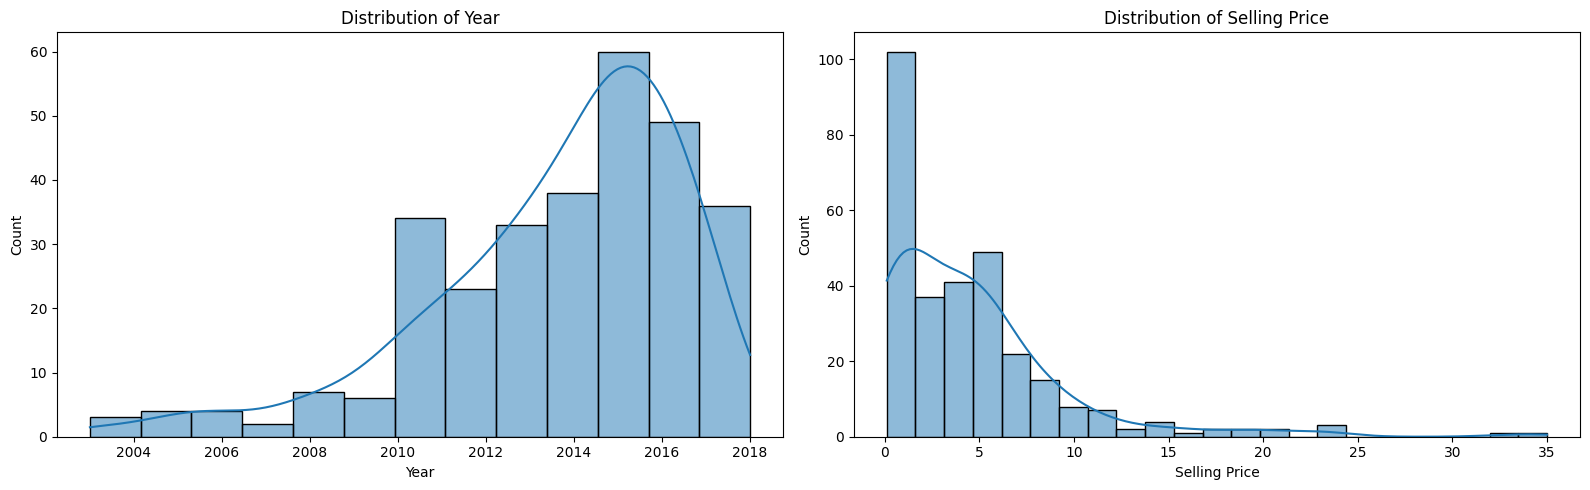

In [28]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Year"], kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")

plt.subplot(1, 2, 2)
sns.histplot(data["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.tight_layout()
plt.show()

In [29]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
261,brio,2016,5.50,5.97,5600,Petrol,Dealer,Manual,0
257,city,2015,8.50,13.60,40324,Petrol,Dealer,Manual,0
236,eon,2016,3.10,4.43,11849,Petrol,Dealer,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0


In [32]:
# Findinf Outliers of Present Price, Selling Price and KMs Driven
data["Kms_Driven"].skew(), data["Present_Price"].skew(), data["Selling_Price"].skew()

(np.float64(6.418134387971488),
 np.float64(4.186894223914912),
 np.float64(2.536521826497541))

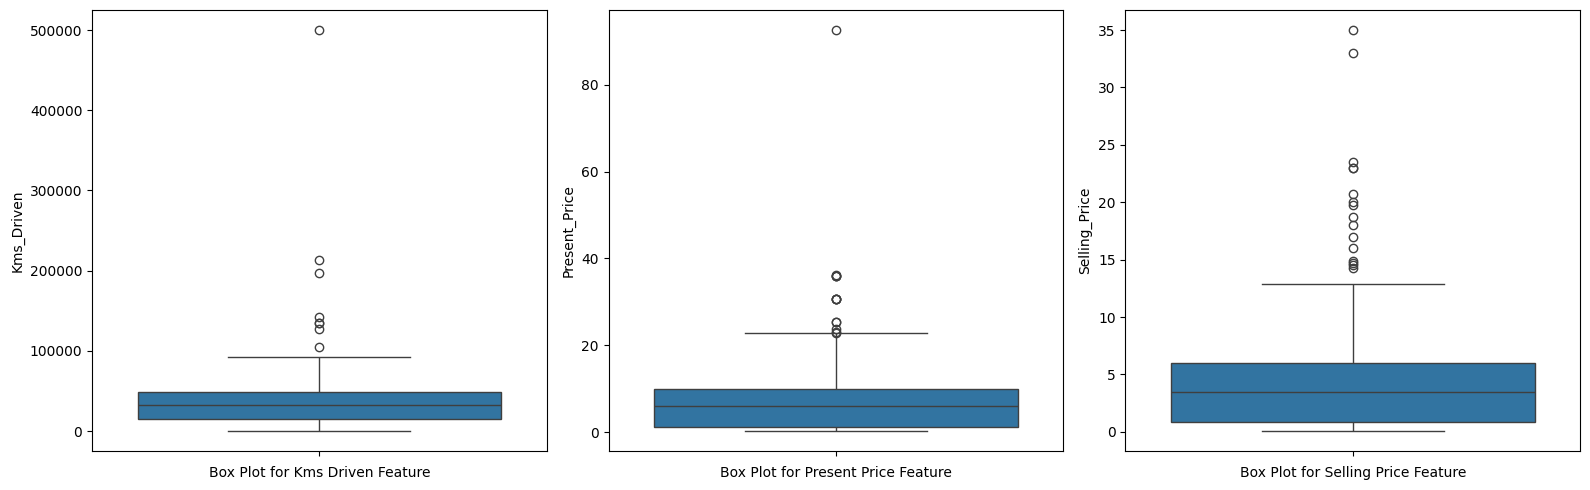

In [39]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data["Kms_Driven"])
plt.xlabel("Box Plot for Kms Driven Feature")

plt.subplot(1, 3, 2)
sns.boxplot(data["Present_Price"])
plt.xlabel("Box Plot for Present Price Feature")

plt.subplot(1, 3, 3)
sns.boxplot(data["Selling_Price"])
plt.xlabel("Box Plot for Selling Price Feature")

plt.tight_layout()
plt.show()